# Analisis Exploratorio

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

Luego de la limpieza de datos se hace un analisis exploratorio sobre los dataframes recurriendo a herramientas estadísticas y de visualización y  combinando dichas herramientas comenzaremos a extraer información adicional que pueda dar respuesta a nuestro problema.

## Relación Fecha - Número de accidentes

Verificamos si existen fechas puntuales en las que existan mas ocurrencias de accidentes para poder preveer los mismos encontrando soluciones a futuro

In [2]:
combined_data = pd.read_csv('Data_Combinada.csv')
combined_data.head()

C:\Users\Usuario\AppData\Local\Temp\ipykernel_22144\2885025754.py:1: DtypeWarning: Columns (15,16) have mixed types. Specify dtype option on import or set low_memory=False.
  combined_data = pd.read_csv('Data_Combinada.csv')


,num_expediente,fecha,hora,localizacion,numero,cod_distrito,distrito,tipo_accidente,estado_meteorológico,tipo_vehiculo,tipo_persona,rango_edad,sexo,cod_lesividad,lesividad,coordenada_x_utm,coordenada_y_utm,positiva_alcohol,positiva_droga
0,2022S000001,01/01/2022,1:30:00,"AVDA. ALBUFERA, 19",19,13.0,PUENTE DE VALLECAS,Alcance,Despejado,Turismo,Conductor,De 30 a 34 años,M,NaN,NaN,"443359,226","4472082,272",0,0.0
1,2022S000001,01/01/2022,1:30:00,"AVDA. ALBUFERA, 19",19,13.0,PUENTE DE VALLECAS,Alcance,Despejado,Turismo,Conductor,De 45 a 49 años,H,NaN,NaN,"443359,226","4472082,272",0,0.0
2,2022S000002,01/01/2022,0:30:00,PLAZA. CANOVAS DEL CASTILLO / PASEO. PRADO,2,3.0,RETIRO,Colisión fronto-lateral,NaN,Motocicleta hasta 125cc,Conductor,De 30 a 34 años,H,NaN,NaN,"441155,351","4474129,588",1,0.0
3,2022S000002,01/01/2022,0:30:00,PLAZA. CANOVAS DEL CASTILLO / PASEO. PRADO,2,3.0,RETIRO,Colisión fronto-lateral,NaN,Motocicleta hasta 125cc,Pasajero,De 35 a 39 años,M,NaN,NaN,"441155,351","4474129,588",0,0.0
4,2022S000002,01/01/2022,0:30:00,PLAZA. CANOVAS DEL CASTILLO / PASEO. PRADO,2,3.0,RETIRO,Colisión fronto-lateral,NaN,Turismo,Conductor,De 40 a 44 años,H,NaN,NaN,"441155,351","4474129,588",0,0.0


In [3]:
#Crear el df date_ocurrency para saber las ocurrencias por fecha
date_ocurrency = combined_data.groupby('fecha').size().reset_index(name='ocurrencia')
date_ocurrency.sort_values(by='ocurrencia', ascending=False, inplace = True)
date_ocurrency.head()

,fecha,ocurrencia
358,18/11/2022,207
319,16/12/2022,207
142,08/02/2022,206
25,02/03/2023,205
465,24/03/2023,202


Creamos un gráfico de lineas de las ocurrencias agrupadas por mes del año para facilitar la visualizacion de los datos y sacar conclusiones a traves de este

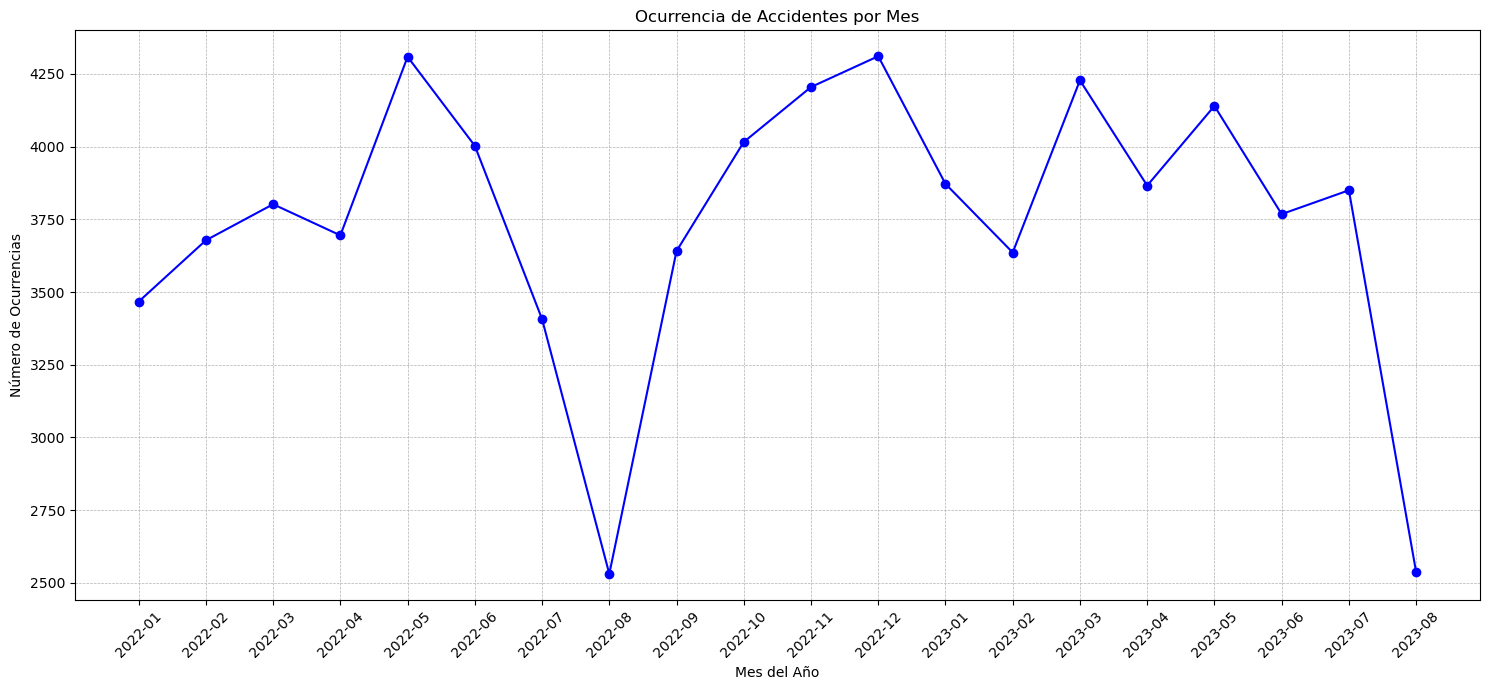

In [4]:
# Ordenar el DataFrame por fecha de forma ascendente
date_ocurrency['fecha'] = pd.to_datetime(date_ocurrency['fecha'], format='%d/%m/%Y')
date_ocurrency.sort_values(by='fecha', ascending=True, inplace=True)

# Agrupar por meses del año
date_ocurrency['year_month'] = date_ocurrency['fecha'].dt.strftime('%Y-%m')
monthly_ocurrency = date_ocurrency.groupby('year_month').sum()['ocurrencia'].reset_index()

# Generar el gráfico de líneas agrupado por meses
plt.figure(figsize=(15, 7))
plt.plot(monthly_ocurrency['year_month'], monthly_ocurrency['ocurrencia'], marker='o', linestyle='-', color='b')
plt.title('Ocurrencia de Accidentes por Mes')
plt.xlabel('Mes del Año')
plt.ylabel('Número de Ocurrencias')
plt.xticks(rotation=45)
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.show()

El gráfico muestra una fluctuación en la ocurrencia de accidentes mes a mes, con ciertos periodos evidenciando picos elevados. Esta variabilidad puede estar influenciada por una serie de factores, como condiciones climáticas, festividades, o eventos locales. Distinguir los meses con alta ocurrencia de accidentes es crucial para tomar medidas preventivas y mejorar la seguridad vial.

Entender las tendencias y patrones en este gráfico nos va apermitir anticipar y prepararnos mejor para futuros escenarios. Al cruzar estos datos con otros factores relevantes, se podrían identificar causas específicas detrás de los incrementos y descensos en las ocurrencias y, por lo tanto, desarrollar soluciones más efectivas.